In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from parser import parse

In [3]:
program = '''
(defn nsum [w]
    (+ (sample (norm 2 1)) w)
)
(defn proc [r t f] 
    (if r t f)
)
(let [v 10
      a (sample (bern 0.1))] 
        (proc a (* (- v a) (nsum 14)) (sample (norm (+ 20 a) 20)))
    )
'''

['r']
['r', 't']


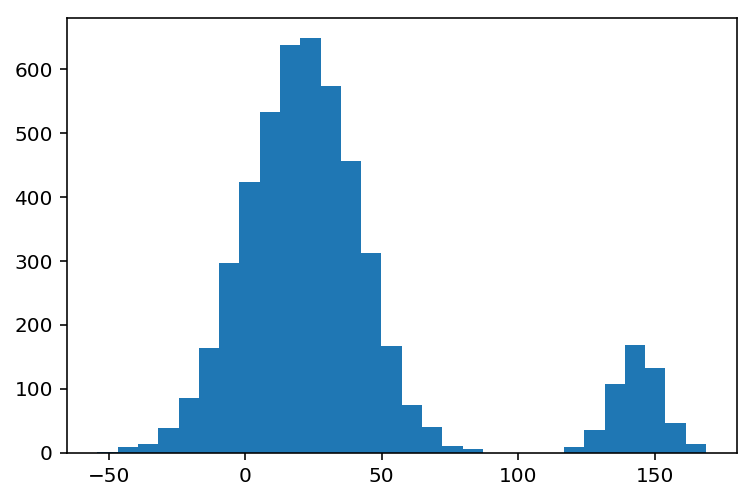

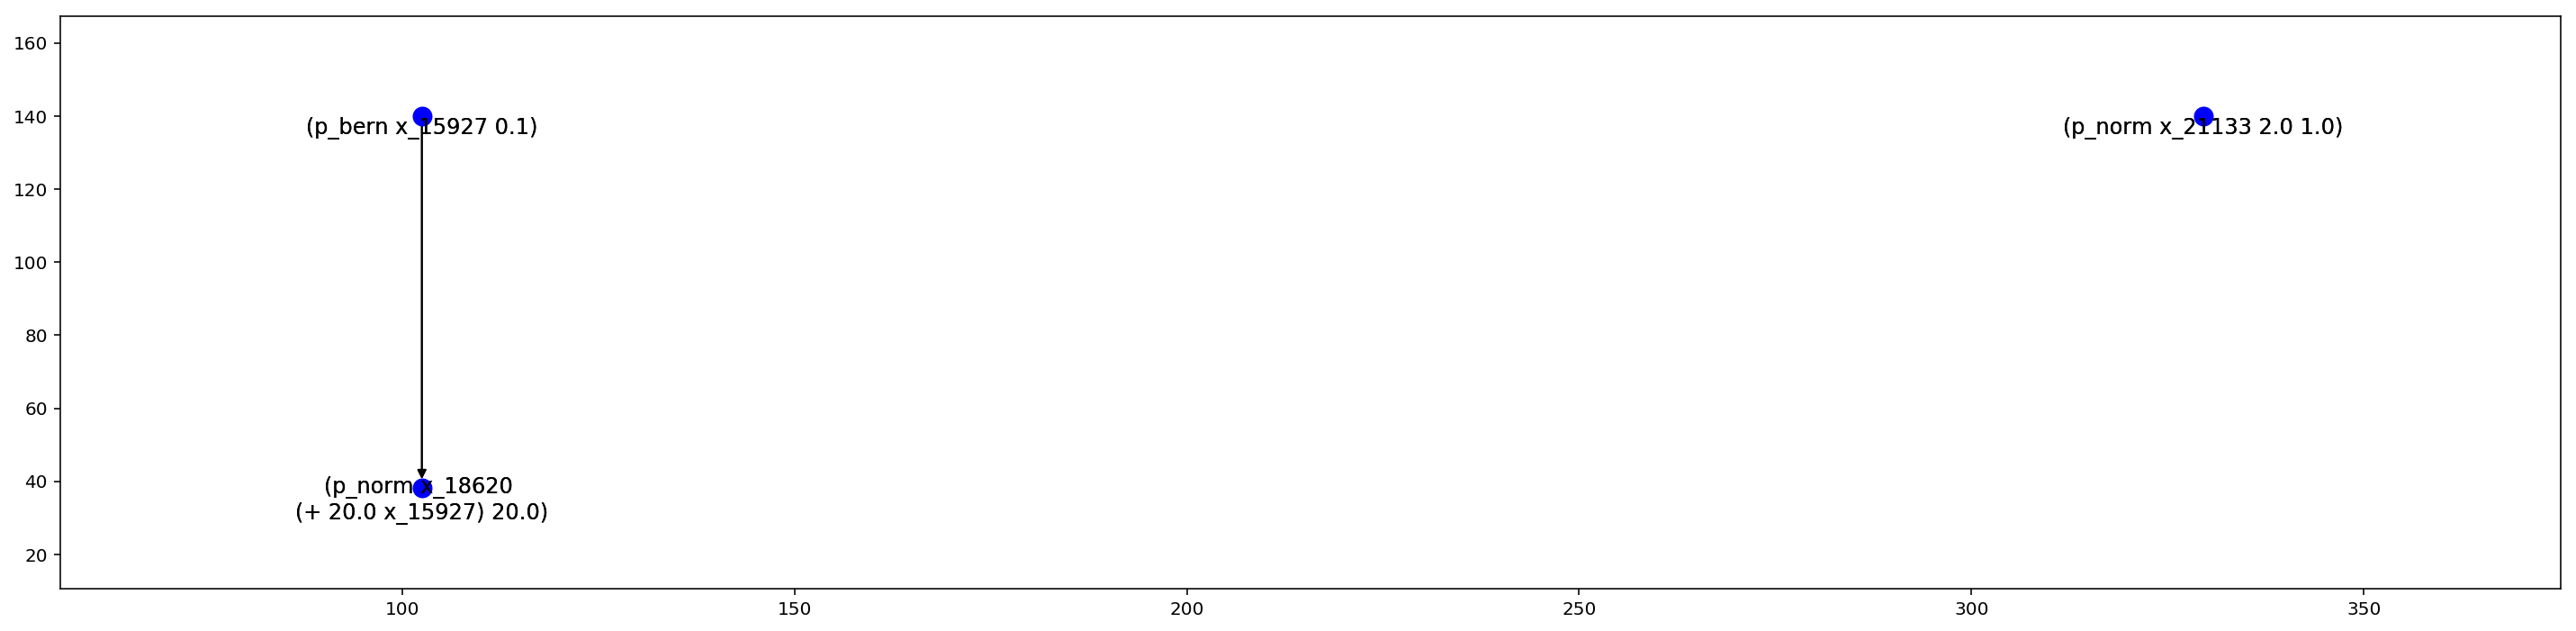

In [4]:
env = parse(program)
nums = [env.run() for _ in range(5000)]
import matplotlib.pyplot as plt
_ = plt.hist(nums, bins=30)

g, e = env.compile()
g.draw()

In [5]:
program = '''
(let [ z (sample (bern 0.8))
       mu (if z (sample (norm 2.0 1.0)) (sample (norm 10.0 1.0)))
       d (norm mu 1.0)
       y 0.5
       _ (observe d y)
       _ (observe d (+ y 4))]
    (sample d)
)
'''
env = parse(program)

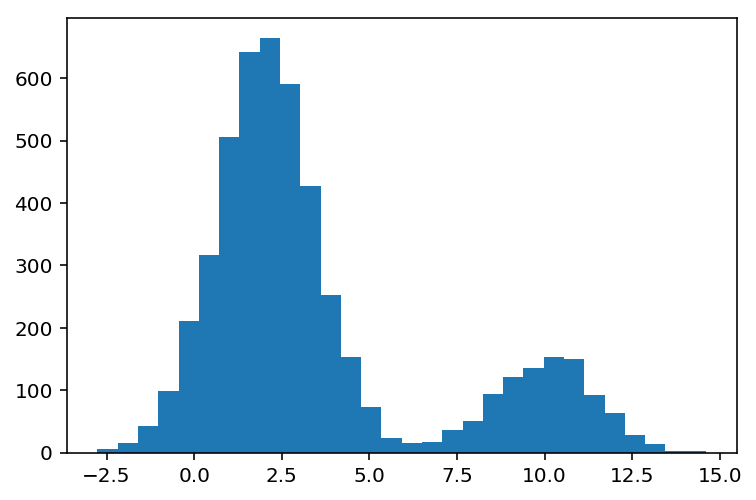

In [6]:
nums = [env.run() for _ in range(5000)]
import matplotlib.pyplot as plt
_ = plt.hist(nums, bins=30)

In [7]:
g, e = env.compile()

In [8]:
for k, v in g.Y.items() :
    print(str(k), str(v))

x_24857 0.5
x_46408 (+ 0.5 4.0)


In [9]:
for k, v in g.P.items() :
    print(str(k), str(v))

x_32569 (p_bern x_32569 0.8)
x_26781 (p_norm x_26781 2.0 1.0)
x_11388 (p_norm x_11388 10.0 1.0)
x_24857 (if True (p_norm x_24857 (if x_32569 x_26781 x_11388) 1.0) 1)
x_46408 (if True (p_norm x_46408 (if x_32569 x_26781 x_11388) 1.0) 1)
x_15376 (p_norm x_15376 (if x_32569 x_26781 x_11388) 1.0)


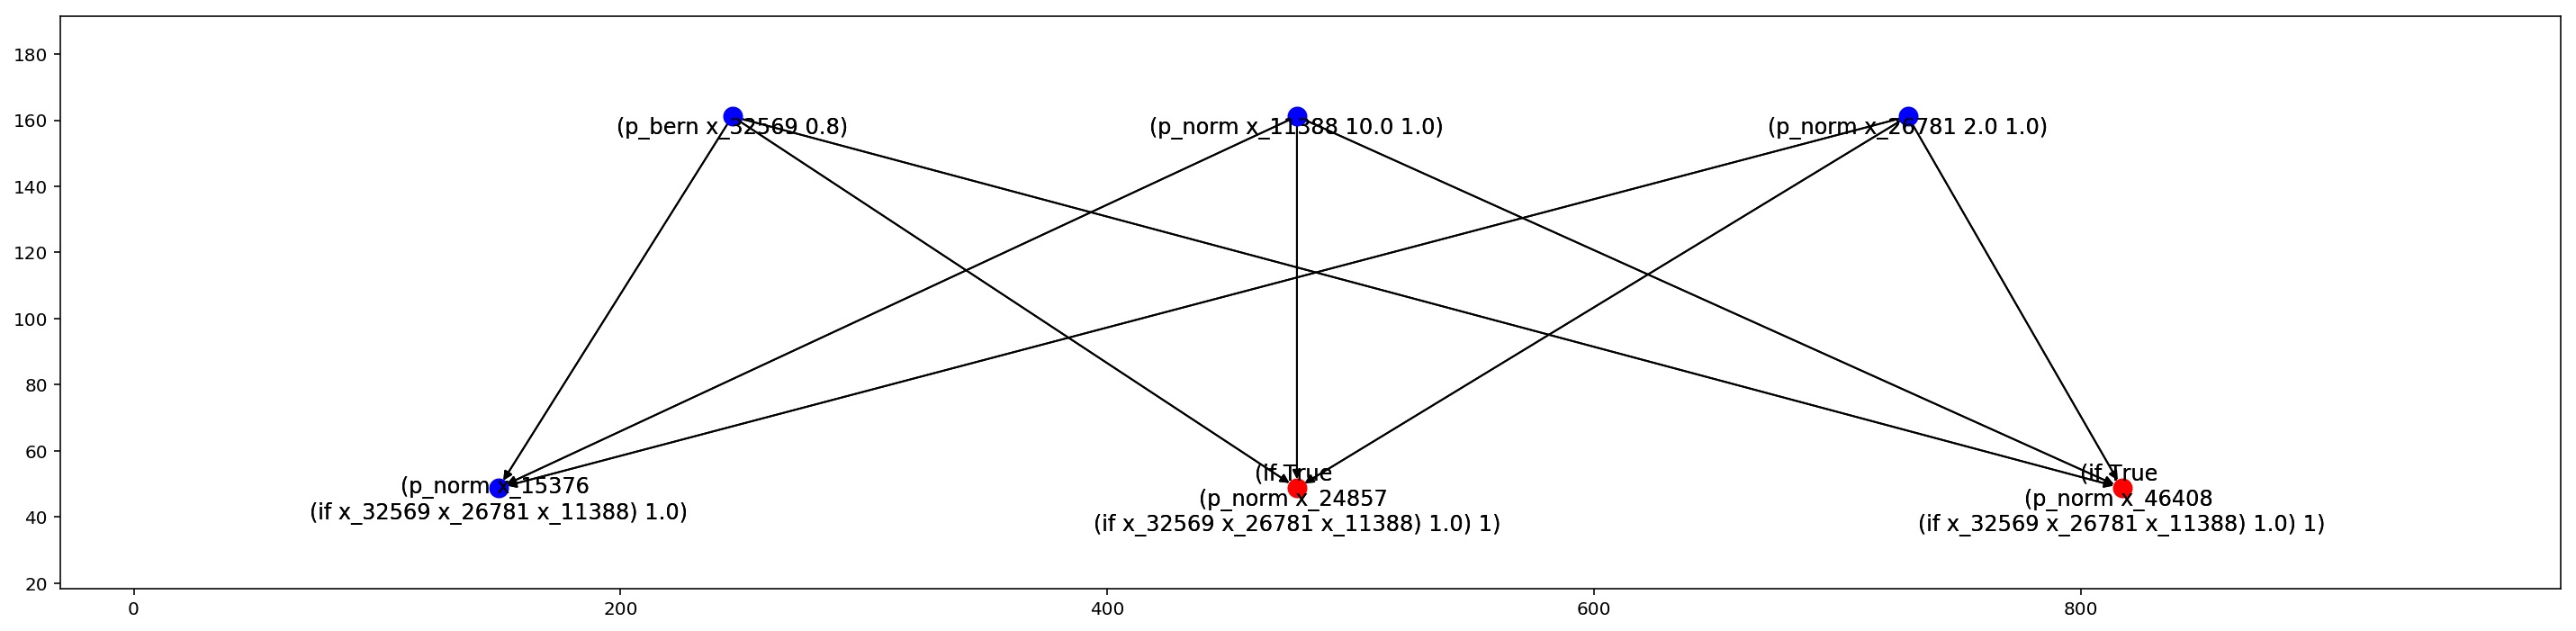

In [10]:
g.draw()